Import the data. Get the date used in this example from http://api.kibot.com/?action=history&symbol=IVE&interval=tickbidask&bp=1&user=guest

In [1]:
import sys; print('Python %s on %s' % (sys.version, sys.platform))
sys.path.extend(['/Users/scottblunsden/Programs/FinML'])

import src.data.reader as rd
import pandas as pd

data_path = '/Users/scottblunsden/Programs/FinML/data/raw/'
file_name = 'IVE_tickbidask'
file_ext = '.txt'

Python 3.6.8 |Anaconda, Inc.| (default, Dec 29 2018, 19:04:46) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)] on darwin


/Users/scottblunsden/anaconda3/envs/FinML/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


Read and print the data (may take some time)

In [2]:
reader = rd.Reader()
df = reader.read_kibot_ticks(data_path+file_name+file_ext)


print(df.head())

                     price    bid    ask  size    v        dv
dates                                                        
2009-09-28 09:30:00  50.79  50.70  50.79   100  100   5079.00
2009-09-28 09:30:00  50.71  50.70  50.79   638  638  32352.98
2009-09-28 09:31:32  50.75  50.75  50.76   100  100   5075.00
2009-09-28 09:31:33  50.75  50.72  50.75   100  100   5075.00
2009-09-28 09:31:50  50.75  50.73  50.76   300  300  15225.00


Save the data in https://en.wikipedia.org/wiki/Apache_Parquet Apache parquet format. 

In [3]:
parq_file_path = data_path+file_name+'.parq'
# Save file to parquet
df.to_parquet(parq_file_path)
# Load from parquet
df = pd.read_parquet(parq_file_path)


/Users/scottblunsden/anaconda3/envs/FinML/lib/python3.6/site-packages/pyarrow/pandas_compat.py:114: FutureWarning: A future version of pandas will default to `skipna=True`. To silence this warning, pass `skipna=True|False` explicitly.
  result = infer_dtype(pandas_collection)


/Users/scottblunsden/anaconda3/envs/FinML/lib/python3.6/site-packages/pyarrow/pandas_compat.py:708: FutureWarning: .labels was deprecated in version 0.24.0. Use .codes instead.
  labels = getattr(columns, 'labels', None) or [
/Users/scottblunsden/anaconda3/envs/FinML/lib/python3.6/site-packages/pyarrow/pandas_compat.py:735: FutureWarning: the 'labels' keyword is deprecated, use 'codes' instead
  return pd.MultiIndex(levels=new_levels, labels=labels, names=columns.names)
/Users/scottblunsden/anaconda3/envs/FinML/lib/python3.6/site-packages/pyarrow/pandas_compat.py:752: FutureWarning: .labels was deprecated in version 0.24.0. Use .codes instead.
  labels, = index.labels


Plot the initial data. 

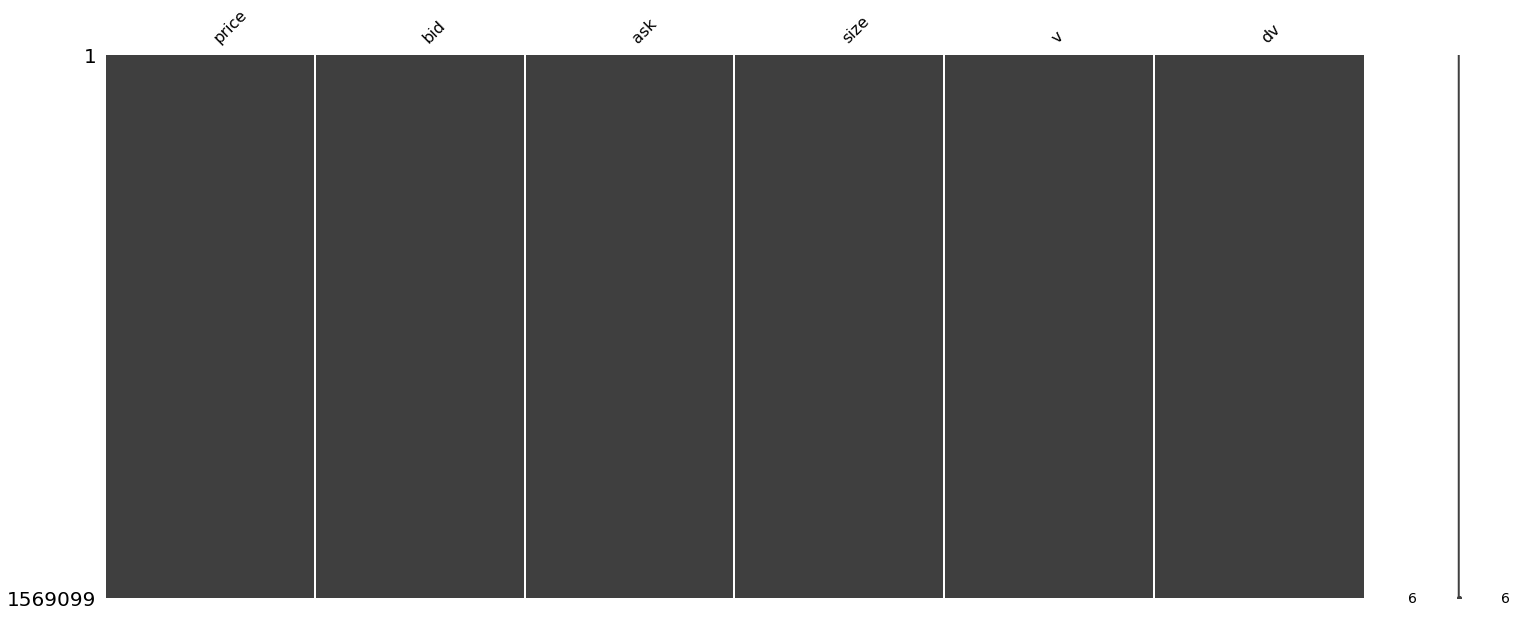

In [4]:
# import visual tools
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline
import seaborn as sns

plt.style.use('seaborn-talk')
plt.style.use('bmh')

plt.rcParams['font.weight'] = 'medium'
blue, green, red, purple, gold, teal = sns.color_palette('colorblind', 6)

import missingno as msno

msno.matrix(df)

Plot the data. The outliers are shown to the left of the main box plot.

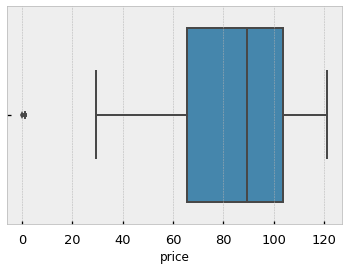

In [5]:
sns.boxplot(df.price)

Clean the data using the MAD outlier detection system and remove them. Plot the result.

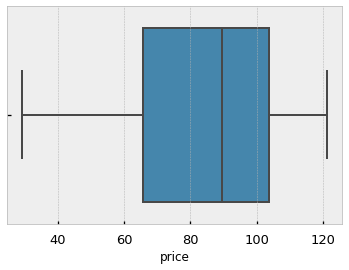

In [6]:
import src.features.datacleaner as dc

data_cleaner = dc.DataCleaner()

df = data_cleaner.remove_outliers(df, 'price')
sns.boxplot(df.price)

Finally save the cleaned file.

In [7]:
cleaned_out_file = (file_name+'_clean')
parq_file_path = data_path+cleaned_out_file+'.parq'
# Save file to parquet
df.to_parquet(parq_file_path)
# Load from parquet
df = pd.read_parquet(parq_file_path)

/Users/scottblunsden/anaconda3/envs/FinML/lib/python3.6/site-packages/pyarrow/pandas_compat.py:114: FutureWarning: A future version of pandas will default to `skipna=True`. To silence this warning, pass `skipna=True|False` explicitly.
  result = infer_dtype(pandas_collection)


/Users/scottblunsden/anaconda3/envs/FinML/lib/python3.6/site-packages/pyarrow/pandas_compat.py:708: FutureWarning: .labels was deprecated in version 0.24.0. Use .codes instead.
  labels = getattr(columns, 'labels', None) or [
/Users/scottblunsden/anaconda3/envs/FinML/lib/python3.6/site-packages/pyarrow/pandas_compat.py:735: FutureWarning: the 'labels' keyword is deprecated, use 'codes' instead
  return pd.MultiIndex(levels=new_levels, labels=labels, names=columns.names)
/Users/scottblunsden/anaconda3/envs/FinML/lib/python3.6/site-packages/pyarrow/pandas_compat.py:752: FutureWarning: .labels was deprecated in version 0.24.0. Use .codes instead.
  labels, = index.labels
